In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.io as sio
import os
import ieeg_funcs as ief
import dgFuncs as dg
import pickle as pickle
from sklearn import svm
from sklearn.externals import joblib

In [71]:
in_fname='/home/dgroppe/GIT/SZR_ANT/MODELS/smart_srch_small2/classify_metrics_srch.npz'
metrics=np.load(in_fname)
print(metrics.keys())
print(metrics['best_C'])
print(metrics['best_gam'])
print(metrics['best_valid_bal_acc'])
print(metrics['ftr_types'])
print(metrics['valid_bal_acc'])
type(metrics['best_models'])


['valid_sens', 'valid_spec', 'valid_bal_acc', 'train_sens', 'train_spec', 'train_bal_acc', 'train_subs_list', 'mn_stim_latency', 'pptn_missed_szrs', 'pptn_preonset_stim', 'n_train_steps', 'rand_ct', 'C_vals', 'gamma_vals', 'best_valid_bal_acc', 'best_C', 'best_gam', 'best_models', 'ftr_types', 'left_out_id']
0.004183481756224338
0.001178656446375969
0.7918392825679504
['PWR' 'PWR_3SEC' 'PWRSTD_3SEC' 'PWR_9SEC' 'VLTG' 'VLTG_3SEC'
 'VLTGSTD_3SEC']
[[ 0.8448756   0.5         0.5         0.84227345  0.5       ]
 [ 0.83091632  0.5         0.5         0.87064798  0.5       ]
 [ 0.78732641  0.5         0.5         0.8240319   0.5       ]
 [ 0.79152254  0.5         0.5         0.79287491  0.5       ]
 [ 0.6353352   0.5         0.5         0.73147336  0.5       ]
 [ 0.6827682   0.5         0.5         0.70596979  0.5       ]
 [ 0.8406761   0.5         0.5         0.81469593  0.5       ]
 [ 0.57901728  0.5         0.5         0.75274693  0.5       ]]


numpy.ndarray

In [72]:
# Load Data
class_data=np.load('temp_data.npz')
print(class_data.keys())
en_data=np.load('temp_data_ensemb.npz')
print(en_data.keys())

['ftrs', 'szr_class', 'sub_id']
['ftrs', 'szr_class', 'sub_id']


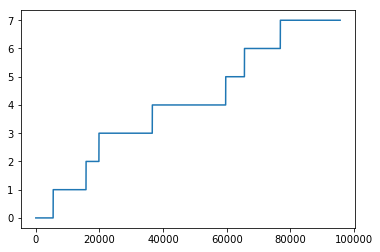

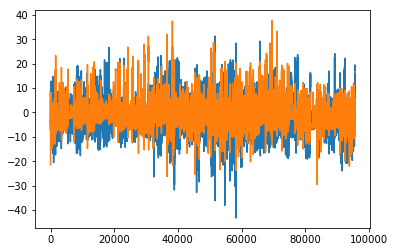

In [73]:
plt.figure()
plt.plot(class_data['sub_id'])
plt.figure()
plt.plot(class_data['ftrs'][:,0],'-')
plt.plot(class_data['ftrs'][:,-1],'-')

In [58]:
print(class_data['ftrs'].shape)
print(class_data.keys())

(41015, 39)
['ftrs', 'szr_class', 'sub_id']


In [74]:
# Loop over models and compute accuracy
#in_file='/home/dgroppe/GIT/SZR_ANT/MODELS/smart_srch_small_svm_temp/temp_classify_models_srch.pkl'
in_file='/home/dgroppe/GIT/SZR_ANT/MODELS/smart_srch_small2/classify_models_srch.pkl'
best_models=pickle.load(open(in_file,'rb'))
best_models.keys()
type(best_models[0])
n_models=len(best_models)
ftrs=class_data['ftrs']
szr_class=class_data['szr_class']
sub_id=class_data['sub_id']

n_train_subs=n_models
temp_train_sens = np.zeros(n_train_subs)
temp_train_spec = np.zeros(n_train_subs)
temp_train_bacc = np.zeros(n_train_subs)
temp_valid_sens = np.zeros(n_train_subs)
temp_valid_spec = np.zeros(n_train_subs)
temp_valid_bacc = np.zeros(n_train_subs)
        
for left_out_id in range(n_models):
    print('Working on left out sub %d/%d' % (left_out_id+1,n_models))
    
    # make predictions from training and validation data
    training_class_hat = best_models[left_out_id].predict(ftrs)
    jive=training_class_hat==szr_class

    train_bool=sub_id!=left_out_id
    valid_bool=sub_id==left_out_id
    ictal_bool=szr_class==1
    preictal_bool=szr_class==0

    use_ids = np.multiply(train_bool, ictal_bool)
    temp_train_sens[left_out_id ]= np.mean(jive[use_ids])
    use_ids=np.multiply(train_bool,preictal_bool)
    temp_train_spec[left_out_id ]=np.mean(jive[use_ids])
    temp_train_bacc[left_out_id ]=(temp_train_spec[left_out_id] + temp_train_sens[left_out_id]) / 2

    use_ids=np.multiply(valid_bool,ictal_bool)
    temp_valid_sens[left_out_id]=np.mean(jive[use_ids])
    use_ids=np.multiply(valid_bool,preictal_bool)
    temp_valid_spec[left_out_id] =np.mean(jive[use_ids])
    temp_valid_bacc[left_out_id] = (temp_valid_spec[left_out_id] + temp_valid_sens[left_out_id]) / 2

Working on left out sub 1/8
Working on left out sub 2/8
Working on left out sub 3/8
Working on left out sub 4/8
Working on left out sub 5/8
Working on left out sub 6/8
Working on left out sub 7/8
Working on left out sub 8/8


In [75]:
print(np.mean(temp_valid_bacc))
print(np.mean(temp_train_bacc))
print(temp_valid_bacc)

0.791839282568
0.805610964555
[ 0.84227345  0.87064798  0.8240319   0.79287491  0.73147336  0.70596979
  0.81469593  0.75274693]


In [66]:
20*(0.66-0.57)

1.8000000000000016

In [65]:
print(np.linspace(.1,.5,10))
print(np.linspace(.1,.5,10)*20)

[ 0.1         0.14444444  0.18888889  0.23333333  0.27777778  0.32222222
  0.36666667  0.41111111  0.45555556  0.5       ]
[  2.           2.88888889   3.77777778   4.66666667   5.55555556
   6.44444444   7.33333333   8.22222222   9.11111111  10.        ]


In [43]:
dude=best_models[0]
print(dude.gamma)
print(dude.C)

3.81931123011e-07
1.0


In [15]:
path_dict=ief.get_path_dict()
print(path_dict.keys())
print(path_dict['szr_ant_root'])
model_name='var_sbox_srch3'
in_file=os.path.join(path_dict['szr_ant_root'],'MODELS',model_name,'classify_metrics_srch.npz')
# Load results
#perf=np.load('classification_metrics_grid.npz')
#perf=np.load('classification_metrics_pwr_vltg.npz')
#perf=np.load('class_metrics_marr_srch.npz')
perf=np.load(in_file)

dict_keys(['ftrs_root', 'szr_ant_root', 'pics', 'onset_csv', 'ieeg_root'])
/Users/davidgroppe/PycharmProjects/SZR_ANT/


In [16]:
# Get xtick labels
str(perf['try_C'])
xlabs=list()
for c in perf['try_C']:
    xlabs.append(str(c))
print(xlabs)

['0.1', '0.4', '0.7', '1.0']


In [7]:
perf.keys()

['valid_sens',
 'valid_spec',
 'train_spec',
 'train_sens',
 'train_subs_list',
 'try_C',
 'C_ct',
 'pptn_preonset_stim',
 'mn_stim_latency',
 'left_out_id',
 'valid_bal_acc',
 'pptn_missed_szrs',
 'ftr_types',
 'train_bal_acc']

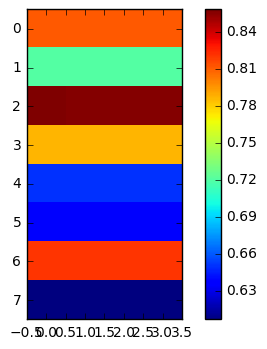

In [17]:
dat=perf['valid_bal_acc']
# dat=perf['pcnt_missed_szrs']
_=plt.imshow(dat,interpolation='nearest')
_=plt.colorbar()

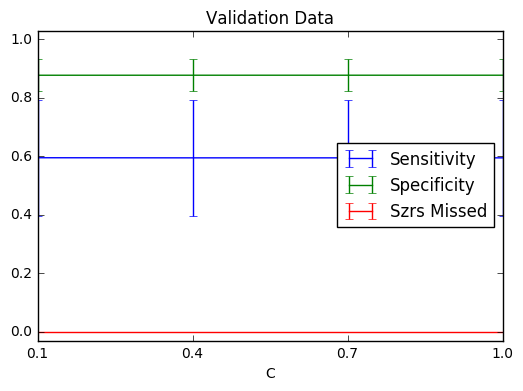

In [18]:
# Valid Sensitivity and Specificity
dat=perf['valid_sens']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Sensitivity')
dat=perf['valid_spec']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Specificity')
dat=perf['pptn_missed_szrs']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Szrs Missed')
# _=plt.plot(np.arange(dat.shape[1]),np.mean(dat,axis=0),'r-o') #makes line visible is no
plt.xlabel('C')
plt.ylim([-.03, 1.03])
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
plt.title('Validation Data')
plt.legend(loc='best')

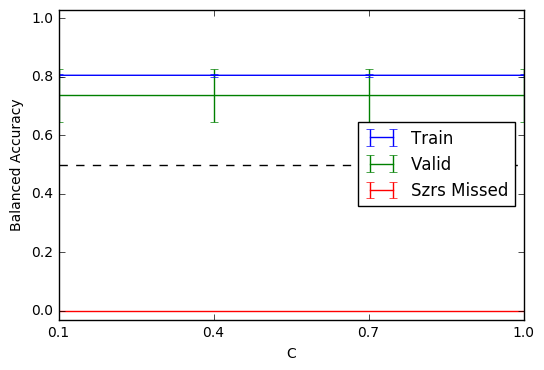

In [19]:
# Balanced Accuracy
dat=perf['train_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Train')
dat=perf['valid_bal_acc']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Valid')
dat=perf['pptn_missed_szrs']
_=plt.errorbar(np.arange(dat.shape[1]),np.mean(dat,axis=0),np.std(dat,axis=0),label='Szrs Missed')
_=plt.plot([0, dat.shape[1]-1],[0.5, 0.5],'k--')
plt.ylabel('Balanced Accuracy')
plt.ylim([-.03, 1.03])
plt.xlabel('C')
plt.xticks(np.arange(len(perf['try_C'])),xlabs)
plt.legend(loc='best')

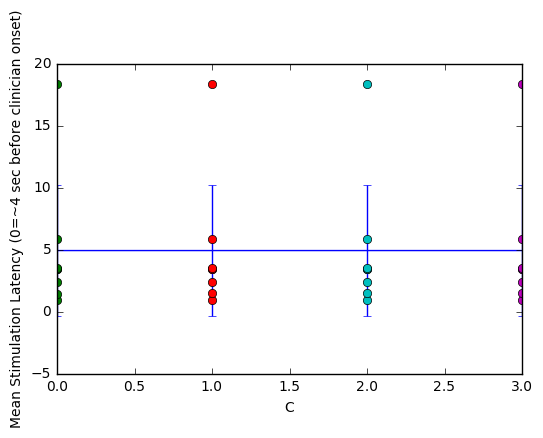

In [21]:
dat=perf['mn_stim_latency']
_=plt.errorbar(np.arange(dat.shape[1]),np.nanmean(dat,axis=0),np.std(dat,axis=0))
n_subs=dat.shape[0]
for a in range(dat.shape[1]):
    _=plt.plot(np.ones(n_subs)*a,dat[:,a],'o')
plt.ylabel('Mean Stimulation Latency (0=~4 sec before clinician onset)')
plt.xlabel('C')
# plt.yscale('log')
# plt.xlim([-.5, 1.5])
# plt.ylim([-.5, 1.5])